# Assignment 6 Solutions
---
1. [Find DFS Path in an Adjacency List](#question-1)
1. [Verify Path BFS in an Adjacency Matrix](#question-2)
1. [Negative Weights in Dijkstra's Algorithm](#question-3)
1. [Validate Path in a Directed Acyclic Graph](#question-4)
1. [MST Verifier](#question-5)
---

## <a name="question-1"></a>1. Find DFS Path in an Adjacency List

Write a function that performs a depth-first search (DFS) on a graph represented as an adjacency list. 

The function should take the following inputs:
* A starting vertex
* An ending vertex


Your function should explore the graph using DFS and return:
* A list representing the path from the starting vertex to the ending vertex, if the ending vertex is found
* None if the ending vertex is not reachable from the starting vertex



In [ ]:
from dsa.graph import AdjacencyListGraph

def dfs(graph, start, end, visited=None, path=None):
    if visited is None:
        visited = set()  # Initialize visited set on the first call

    if path is None:
        path = []  # Initialize path list on the first call

    visited.add(start)  # Mark the current node as visited
    path = path + [start]  # Append the current node to the path

    if start == end:
        return path  # Found the destination; return the current path

    # Explore each unvisited adjacent
    for adjacent in graph.adjacents(start):
        if adjacent not in visited:
            new_path = dfs(graph, adjacent, end, visited, path)  # Recursive DFS call
            if new_path:  # If a valid path is found, return it
                return new_path

    return None  # No path found from this branch


In [ ]:
from dsa.draw import GraphDraw

# undirected graph
g = AdjacencyListGraph()
g.add_edge("A", "B")
g.add_edge("A", "D")

g.add_edge("B", "C")
g.add_edge("B", "F")

g.add_edge("C", "D")
g.add_edge("C", "F")

g.add_edge("D", "E")

g.add_edge("F", "E")


gd = GraphDraw(g)
gd.draw()

In [ ]:
print(dfs(g, "A", "B"))
print(dfs(g, "A", "F"))
print(dfs(g, "D", "B"))
print(dfs(g, "F", "A"))


In [ ]:
# directed graph
g = AdjacencyListGraph()
g.add_edge("A", "B", directed=True)
g.add_edge("A", "D", directed=True)

g.add_edge("B", "C", directed=True)
g.add_edge("B", "F", directed=True)

g.add_edge("C", "D", directed=True)
g.add_edge("C", "F", directed=True)

g.add_edge("D", "E", directed=True)

g.add_edge("F", "E", directed=True)


gd = GraphDraw(g, directed=True)
gd.draw()

In [ ]:
print(dfs(g, "A", "B"))
print(dfs(g, "A", "F"))
print(dfs(g, "D", "B"))
print(dfs(g, "F", "A"))


## <a name="question-2"></a>2. Verify Path BFS in an Adjacency Matrix

Write a function that performs breadth-first search (BFS) on a graph represented as an adjacency matrix. 

The function should take the following inputs:
* A starting vertex
* An ending vertex

The function should return a Boolean indicating whether a path exists between the two vertices.



In [ ]:
from dsa.graph import AdjacencyMatrixGraph

def bfs_adjacency_matrix(graph, start, end):
    visited = set()  # Track visited nodes to avoid revisiting
    start_label = graph.label_index[start]  # Convert start node label to index
    end_label = graph.label_index[end]      # Convert end node label to index
    queue = [start_label]  # Initialize the queue with the start node

    while queue:
        current = queue.pop(0)  # Dequeue the front element (FIFO for BFS)

        if current == end_label:
            return True  # Found a path to the target node

        visited.add(current)  # Mark current node as visited

        # Check each adjacent of the current node
        for adjacent, is_edge in enumerate(graph.array[current]):
            # If there's an edge and the adjacent hasn't been visited
            if is_edge and adjacent not in visited and adjacent not in queue:
                queue.append(adjacent)  # Enqueue the adjacent

    return False  # If the end node is not reachable

In [ ]:
# undirected graph
dgraph = AdjacencyMatrixGraph(["A", "B", "C", "D", "E", "F"])
dgraph.add_edge("A", "B")
dgraph.add_edge("A", "D")

dgraph.add_edge("B", "C")
dgraph.add_edge("B", "F")

dgraph.add_edge("C", "D")
dgraph.add_edge("C", "F")

dgraph.add_edge("D", "E") 
dgraph.add_edge("E", "F") 
dgraph.print_graph()

print(bfs_adjacency_matrix(dgraph, start="A", end="D"))
print(bfs_adjacency_matrix(dgraph, start="A", end="F"))
print(bfs_adjacency_matrix(dgraph, start="C", end="D"))
print(bfs_adjacency_matrix(dgraph, start="C", end="E"))
print(bfs_adjacency_matrix(dgraph, start="E", end="C"))
print(bfs_adjacency_matrix(dgraph, start="F", end="A"))

In [ ]:
gd = GraphDraw(dgraph)
gd.draw()

Directed Graph example

In [ ]:
gd = GraphDraw(dgraph, directed=True)
gd.draw()

In [ ]:
dgraph = AdjacencyMatrixGraph(["A", "B", "C", "D", "E", "F"])
dgraph.add_edge("A", "B", directed=True)
dgraph.add_edge("A", "D", directed=True)

dgraph.add_edge("B", "C", directed=True)
dgraph.add_edge("B", "F", directed=True)

dgraph.add_edge("C", "D", directed=True)
dgraph.add_edge("C", "F", directed=True)

dgraph.add_edge("D", "E", directed=True)
dgraph.add_edge("E", "F", directed=True)
dgraph.print_graph()

print(bfs_adjacency_matrix(dgraph, start="A", end="D"))
print(bfs_adjacency_matrix(dgraph, start="A", end="F"))
print(bfs_adjacency_matrix(dgraph, start="C", end="D"))
print(bfs_adjacency_matrix(dgraph, start="C", end="E"))
print(bfs_adjacency_matrix(dgraph, start="E", end="C"))
print(bfs_adjacency_matrix(dgraph, start="F", end="A"))


## <a name="question-1"></a>3. Negative Weights in Dijkstra's Algorithm

Why does Dijkstra's Algorithm NOT work for graphs with negative weights? Come up with an example graph that demonstrates this.

In the following example, there is a negative path. The correct shortest path from A to B is A->C->B (weight of 3).
However, Dijkstra returns the incorrect path of A->B (weight of 5). 

In [1]:
from dsa.heap import MinHeap

def dijkstra(graph, start):
    """
    Find shortest paths from start vertex to all other vertices using Dijkstra's algorithm.
    
    Args:
        graph: Dictionary where keys are vertices and values are lists of (adjacent, weight) tuples
        start: Starting vertex
    
    Returns:
        weight_table: Dictionary mapping each vertex to its shortest distance from start
        predecessor_table: Dictionary mapping each vertex to its predecessor_table vertex in shortest path
    """
    # Initialize weight_table and predecessor_tables
    weight_table = {v:float("inf") for v in graph.vertices()} 
    predecessor_table = {}
    weight_table[start] = 0

    # Hash set to keep track of visited vertices
    visited = set()

    # Priority queue: (distance, vertex) - insert starting vertex
    pq = MinHeap()
    pq.insert((0, start))
    
    while not pq.is_empty():
        current_weight, current = pq.pop() #heapq.heappop(pq)
        
        # Skip if already visited
        if current in visited:
            continue
            
        visited.add(current)
        
        # Check all adjacents
        for adjacent, weight in graph[current].items():
            if adjacent in visited:
                continue
                
            new_weight = current_weight + weight
            # If we found a shorter path, update it
            if new_weight < weight_table[adjacent]:
                weight_table[adjacent] = new_weight
                predecessor_table[adjacent] = current
                pq.insert((new_weight, adjacent))
    return weight_table, predecessor_table

def get_shortest_path(predecessor_table, start, end):
    """
    Reconstruct the shortest path from start to end using the predecessor_table dictionary.
    
    Args:
        predecessor_table: Dictionary from dijkstra function
        start: Starting vertex
        end: Ending vertex
    
    Returns:
        List of vertices representing the shortest path, or None if no path exists
    """
    if end not in predecessor_table and end != start:
        return None  # No path exists
    
    path = []
    current = end
    
    while current is not None:
        path.append(current)
        current = predecessor_table.get(current)
    
    path.reverse()
    return path if path[0] == start else None

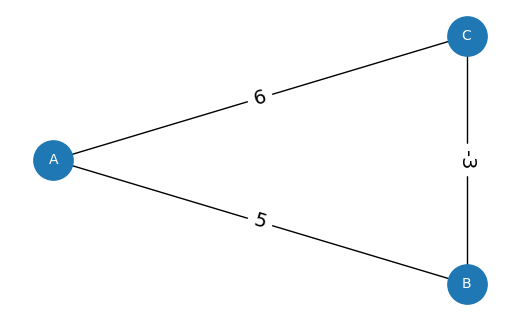

In [2]:
from dsa.graph import AdjacencyListWeightedGraph
from dsa.dijkstras import shortest_path, find_path
from dsa.draw import GraphDraw

graph = AdjacencyListWeightedGraph()
graph.add_edge('A', 'B', 5, directed=True)
graph.add_edge('A', 'C', 6, directed=True)
graph.add_edge('C', 'B', -3, directed=True)

gd = GraphDraw(graph, weighted=True)
gd.draw()



In the following example, there is a negative path. The correct shortest path from A to B is A->C->B (weight of 3).
However, Dijkstra returns the incorrect path of A->B (weight of 5). 

In [3]:
g = AdjacencyListWeightedGraph()
g.add_edge('A', 'B', 5)
g.add_edge('A', 'C', 6)
g.add_edge('B', 'C', -3)

weight_table, predecessor_table = dijkstra(g, 'A')

print("Shortest weight_table from A:")
for vertex in sorted(weight_table.keys()):
    print(f"  A -> {vertex}: {weight_table[vertex]}")
get_shortest_path(predecessor_table, "A", "B")

Shortest weight_table from A:
  A -> A: 0
  A -> B: 5
  A -> C: 2


['A', 'B']

In [4]:
predecessor_table

{'B': 'A', 'C': 'B'}

## <a name="question-4"></a>4. Validate Path in a Directed Acyclic Graph 

Write a function that determines whether a given path is valid within a directed graph. The function should accept:
* A directed acyclic graph can be represented using either an adjacency list or an adjacency matrix
* A sequence of nodes representing the path to be validated

The function should return a Boolean indicating whether the path follows valid directed edges within the graph. 

Make sure to consider edge cases such as:
* An empty path
* A path containing nodes not present in the graph
* A single-node path
* Cycles within the graph


adjacency list version

In [ ]:
from dsa.graph import AdjacencyListGraph

def is_valid_path(graph, path):
    if not path:
        return False

    if path[0] not in graph.vertices():
        return False

    if len(path) == 0:
        return False  # An empty path is not valid

    previous = path[0]  # Start from the first vertex

    for vertex in path[1:]:
        # Check if the next vertex is adjacent to the previous one
        if vertex not in graph.adjacents(previous):
            return False  # Invalid if no direct edge exists
        previous = vertex  

    return True  
    
g = AdjacencyListGraph()
g.add_edge("A", "B", directed=True)
g.add_edge("A", "D", directed=True)

g.add_edge("B", "C", directed=True)
g.add_edge("B", "F", directed=True)

g.add_edge("C", "D", directed=True)
g.add_edge("C", "F", directed=True)

g.add_edge("D", "E", directed=True)
g.add_edge("E", "F", directed=True)

print(is_valid_path(g, ["A", "B", "C", "D", "E", "F"]))
print(is_valid_path(g, ["A", "C"]))
print(is_valid_path(g, ["B", "C", "D"]))
print(is_valid_path(g, ["B", "C", "D", "F"]))
print(is_valid_path(g, ["X"]))
print(is_valid_path(g, []))


In [ ]:
gd = GraphDraw(g, directed=True)
gd.draw()

adjacency matrix version

In [ ]:
from dsa.graph import AdjacencyMatrixGraph

def is_valid_path(graph, path):
    """
    Check whether the given path is valid in a directed acyclic graph (DAG).

    Parameters:
    - graph: A dictionary representing the adjacency list of the graph.
    - path: A list representing the path to be checked.

    Returns:
    - True if the path is valid, False otherwise.
    """

    for i in range(len(path) - 1):
        current = path[i]
        next = path[i + 1]

        if current not in graph.vertices():
            return False

        # Check if the next node exists in the adjacency list of the current node
        if not graph.is_edge(current, next):
            return False

    # Check if the last node exists in the graph
    if path[-1] not in graph.labels:
        return False

    return True

In [ ]:
g = AdjacencyMatrixGraph(["A", "B", "C", "D", "E", "F"])
g.add_edge("A", "B", directed=True)
g.add_edge("A", "D", directed=True)

g.add_edge("B", "C", directed=True)
g.add_edge("B", "F", directed=True)

g.add_edge("C", "D", directed=True)
g.add_edge("C", "F", directed=True)

g.add_edge("D", "E", directed=True)
g.add_edge("E", "F", directed=True)



In [ ]:
gd = GraphDraw(g, directed=True)
gd.draw()


In [ ]:
print(is_valid_path(g, ["A", "B", "C", "D", "E", "F"]))
print(is_valid_path(g, ["A", "C"]))
print(is_valid_path(g, ["B", "C", "D"]))
print(is_valid_path(g, ["B", "C", "D", "F"]))

## <a name="question-5"></a>5. MST Verifier

Write a function that accepts:
* A weighted undirected graph
* A subgraph (tree)

It should verify whether the subgraph is a minimum spanning tree in the graph.

It should return True if:
* Subgraph is a tree (i.e., connected and acyclic)
* Subgraph spans all vertices in the graph
* Subgraph is of minimum possible total weight
* Do not assume subgraph is already an MST

Using the Graph class and Prims' Algorithm from the DSA package should help with this section. 





Create example graph and MST
* t1 is a valid MST
* t2 is a tree with a node missing from the MST
* t3 is a tree with a cycle

In [ ]:
from dsa.prim import prims_mst, mst_weight
from dsa.graph import AdjacencyListWeightedGraph, AdjacencyMatrixWeightedGraph
from dsa.draw import GraphDraw


g = AdjacencyListWeightedGraph()
g.add_edge("A", "B", 3)
g.add_edge("A", "D", 4)
g.add_edge("A", "F", 20)

g.add_edge("B", "C", 4)
g.add_edge("B", "E", 2)

g.add_edge("C", "F", 5)
g.add_edge("D", "E", 5)

g.add_edge("E", "F", 2)

t1 = prims_mst(g, "A")

pos = {
'A': (0, .5),
'B': (1, 1),
'C': (2, 1),
'D': (1, 0),
'E': (2, 0),
'F': (3, .5),
}
gd = GraphDraw(g, weighted=True)
gd.draw(pos=pos)




Tree 1

In [ ]:
gd = GraphDraw(t1, weighted=True)
gd.draw(pos=pos)


Tree 2

In [ ]:
t2 = AdjacencyListWeightedGraph()
t2.add_edge("A", "B", 3)
t2.add_edge("A", "D", 4)

t2.add_edge("B", "C", 4)
t2.add_edge("B", "E", 2)

gd = GraphDraw(t2, weighted=True)
gd.draw(pos=pos)


Tree 3

In [ ]:
t3 = AdjacencyListWeightedGraph()
t3.add_edge("A", "B", 3)
t3.add_edge("A", "D", 4)

t3.add_edge("B", "C", 4)
t3.add_edge("B", "E", 2)
t3.add_edge("E", "F", 2)

t3.add_edge("C", "F", 5)

gd = GraphDraw(t3, weighted=True)
gd.draw(pos=pos)


In [ ]:
import random
from dsa.queue import Queue

def bfs_check_cycle(graph, start):
    ''' BFS traversal to check for cycles and collect connected vertices. 
    Accepts a graph and a starting vertex label '''
    queue = Queue()
    visited = {start}
    parent = {start: None}
    queue.enqueue(start)

    while not queue.is_empty():
        current = queue.dequeue()
        for adjacent in graph.adjacents(current):
            if adjacent not in visited:
                visited.add(adjacent)
                parent[adjacent] = current
                queue.enqueue(adjacent)
            elif parent[current] != adjacent:
                # A cycle is detected
                return set()
    return visited

def verify_mst(graph, mst):
    ''' Verifies whether a subgraph (MST) is a valid MST found in graph '''
    # Check if the sets of vertices match
    if set(graph.vertices()) != set(mst.vertices()):
        return False

    # the starting point should not affect the MST weight
    start = random.choice(graph.vertices())

    # Compare total weights of expected MST and provided MST
    if mst_weight(prims_mst(graph, start)) != mst_weight(mst):
        return False

    # Ensure the MST is connected and acyclic
    return bfs_check_cycle(mst, start) == set(graph.vertices())

print(verify_mst(g, t1))
print(verify_mst(g, t2))
print(verify_mst(g, t3))
